In [ ]:
from google.colab import files
files.upload()

Saving cardio_train.csv to cardio_train.csv


{'cardio_train.csv': b'id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio\n0;18393;2;168;62.0;110;80;1;1;0;0;1;0\n1;20228;1;156;85.0;140;90;3;1;0;0;1;1\n2;18857;1;165;64.0;130;70;3;1;0;0;0;1\n3;17623;2;169;82.0;150;100;1;1;0;0;1;1\n4;17474;1;156;56.0;100;60;1;1;0;0;0;0\n8;21914;1;151;67.0;120;80;2;2;0;0;0;0\n9;22113;1;157;93.0;130;80;3;1;0;0;1;0\n12;22584;2;178;95.0;130;90;3;3;0;0;1;1\n13;17668;1;158;71.0;110;70;1;1;0;0;1;0\n14;19834;1;164;68.0;110;60;1;1;0;0;0;0\n15;22530;1;169;80.0;120;80;1;1;0;0;1;0\n16;18815;2;173;60.0;120;80;1;1;0;0;1;0\n18;14791;2;165;60.0;120;80;1;1;0;0;0;0\n21;19809;1;158;78.0;110;70;1;1;0;0;1;0\n23;14532;2;181;95.0;130;90;1;1;1;1;1;0\n24;16782;2;172;112.0;120;80;1;1;0;0;0;1\n25;21296;1;170;75.0;130;70;1;1;0;0;0;0\n27;16747;1;158;52.0;110;70;1;3;0;0;1;0\n28;17482;1;154;68.0;100;70;1;1;0;0;0;0\n29;21755;2;162;56.0;120;70;1;1;1;0;1;0\n30;19778;2;163;83.0;120;80;1;1;0;0;1;0\n31;21413;1;157;69.0;130;80;1;1;0;0;1;0\n32;23046;1;158;90.0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 9999
data = pd.read_csv('cardio_train.csv', delimiter=';')

In [ ]:
data.head(10)

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   
5   8  21914       1     151    67.0    120     80            2     2      0   
6   9  22113       1     157    93.0    130     80            3     1      0   
7  12  22584       2     178    95.0    130     90            3     3      0   
8  13  17668       1     158    71.0    110     70            1     1      0   
9  14  19834       1     164    68.0    110     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
5     0       0       0  
6     0       1       0  
7     0       1       1  
8     0       1       0  
9     0       0       0

In [ ]:
df = data.copy()
data.drop('id', inplace=True, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [ ]:
data.describe().T

count          mean          std      min      25%      50%  \
age          70000.0  19468.865814  2467.251667  10798.0  17664.0  19703.0   
gender       70000.0      1.349571     0.476838      1.0      1.0      1.0   
height       70000.0    164.359229     8.210126     55.0    159.0    165.0   
weight       70000.0     74.205690    14.395757     10.0     65.0     72.0   
ap_hi        70000.0    128.817286   154.011419   -150.0    120.0    120.0   
ap_lo        70000.0     96.630414   188.472530    -70.0     80.0     80.0   
cholesterol  70000.0      1.366871     0.680250      1.0      1.0      1.0   
gluc         70000.0      1.226457     0.572270      1.0      1.0      1.0   
smoke        70000.0      0.088129     0.283484      0.0      0.0      0.0   
alco         70000.0      0.053771     0.225568      0.0      0.0      0.0   
active       70000.0      0.803729     0.397179      0.0      1.0      1.0   
cardio       70000.0      0.499700     0.500003      0.0      0.0      0.0   

                 75%      max  
age          21327.0  23713.0  
gender           2.0      2.0  
height         170.0    250.0  
weight          82.0    200.0  
ap_hi          140.0  16020.0  
ap_lo           90.0  11000.0  
cholesterol      2.0      3.0  
gluc             1.0      3.0  
smoke            0.0      1.0  
alco             0.0      1.0  
active           1.0      1.0  
cardio           1.0      1.0

In [ ]:
data.duplicated().sum()

24

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
#Converting age from days to years
data['age'] = (data['age'] / 365).round().astype('int64')

In [ ]:
#ap_lo (diastolic bp) cannot be higher than ap_hi (systolic bp)
data = data.drop(data[data['ap_lo'] > data['ap_hi']].index)

In [ ]:
#create a body mass index 'bmi' feature from weight and height columns
data["bmi"] = data["weight"] / (data["height"]/100)**2

In [ ]:
#Check for null value
data.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
bmi            0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68742 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68742 non-null  int64  
 1   gender       68742 non-null  int64  
 2   height       68742 non-null  int64  
 3   weight       68742 non-null  float64
 4   ap_hi        68742 non-null  int64  
 5   ap_lo        68742 non-null  int64  
 6   cholesterol  68742 non-null  int64  
 7   gluc         68742 non-null  int64  
 8   smoke        68742 non-null  int64  
 9   alco         68742 non-null  int64  
 10  active       68742 non-null  int64  
 11  cardio       68742 non-null  int64  
 12  bmi          68742 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 7.3 MB


In [ ]:
#Systolic bp cannot be lower than 70 and higher than 200,
#diastolic bp cannot be less than 40 and more than 130. We remove the values which do not pass this criteria.
data.drop(data[(data.ap_hi < 70) | (data.ap_hi > 200)].index, inplace = True)
data.drop(data[(data.ap_lo < 40) | (data.ap_lo > 130)].index, inplace = True)

In [ ]:
data.describe().T

count        mean        std        min         25%  \
age          68582.0   53.325756   6.769094  30.000000   48.000000   
gender       68582.0    1.348546   0.476513   1.000000    1.000000   
height       68582.0  164.358534   8.184496  55.000000  159.000000   
weight       68582.0   74.109949  14.324125  11.000000   65.000000   
ap_hi        68582.0  126.593100  16.480449  70.000000  120.000000   
ap_lo        68582.0   81.266761   9.342744  40.000000   80.000000   
cholesterol  68582.0    1.364440   0.678770   1.000000    1.000000   
gluc         68582.0    1.225569   0.571462   1.000000    1.000000   
smoke        68582.0    0.087939   0.283208   0.000000    0.000000   
alco         68582.0    0.053352   0.224736   0.000000    0.000000   
active       68582.0    0.803316   0.397494   0.000000    1.000000   
cardio       68582.0    0.494474   0.499973   0.000000    0.000000   
bmi          68582.0   27.519357   6.050416   3.471784   23.875115   

                    50%         75%         max  
age           54.000000   58.000000   65.000000  
gender         1.000000    2.000000    2.000000  
height       165.000000  170.000000  250.000000  
weight        72.000000   82.000000  200.000000  
ap_hi        120.000000  140.000000  200.000000  
ap_lo         80.000000   90.000000  130.000000  
cholesterol    1.000000    1.000000    3.000000  
gluc           1.000000    1.000000    3.000000  
smoke          0.000000    0.000000    1.000000  
alco           0.000000    0.000000    1.000000  
active         1.000000    1.000000    1.000000  
cardio         0.000000    1.000000    1.000000  
bmi           26.346494   30.119376  298.666667

In [ ]:
df = data.copy(deep = True)

df['gender'].replace({1: 'woman', 2: 'man'}, inplace = True)
df['cholesterol'].replace({1: 'normal', 2: 'above normal', 3: 'well above normal'}, inplace = True)
df['gluc'].replace({1: 'normal', 2: 'above normal', 3: 'well above normal'}, inplace = True)
df['smoke'].replace({0: 'No', 1: 'Yes'}, inplace = True)
df['alco'].replace({0: 'No', 1: 'Yes'}, inplace = True)
df['active'].replace({0: 'No', 1: 'Yes'}, inplace = True)
df['cardio'].replace({0: 'No', 1: 'Yes'}, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68582 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68582 non-null  int64  
 1   gender       68582 non-null  object 
 2   height       68582 non-null  int64  
 3   weight       68582 non-null  float64
 4   ap_hi        68582 non-null  int64  
 5   ap_lo        68582 non-null  int64  
 6   cholesterol  68582 non-null  object 
 7   gluc         68582 non-null  object 
 8   smoke        68582 non-null  object 
 9   alco         68582 non-null  object 
 10  active       68582 non-null  object 
 11  cardio       68582 non-null  object 
 12  bmi          68582 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 7.3+ MB


In [ ]:
# Convert columns to int64
#int_cols = ['gender', 'height', 'cholesterol','gluc','smoke','alco','active','cardio' ]  # List of column names to convert to int64
#df[int_cols] = df[int_cols].astype('int64')

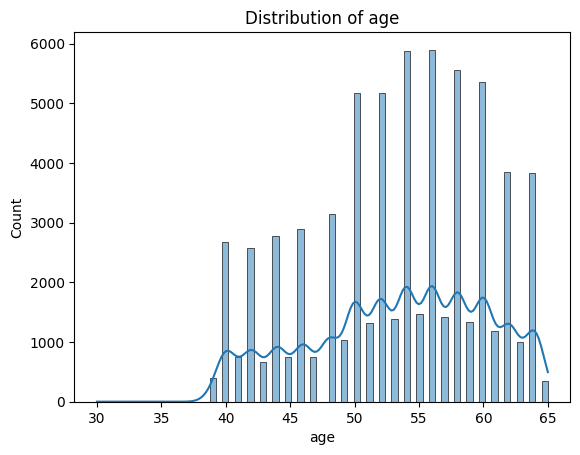

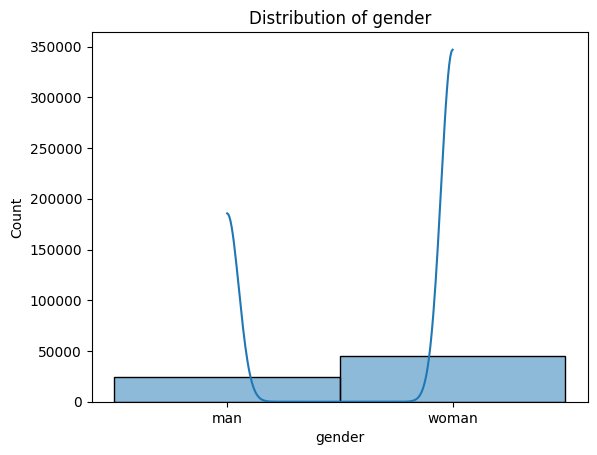

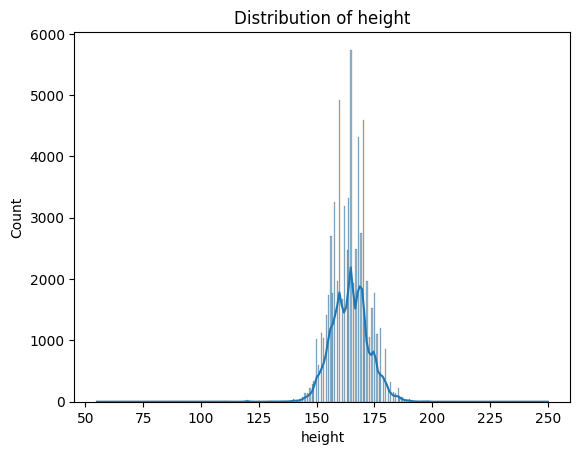

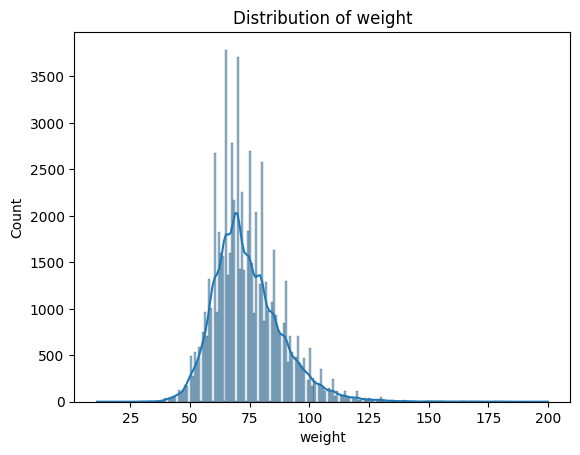

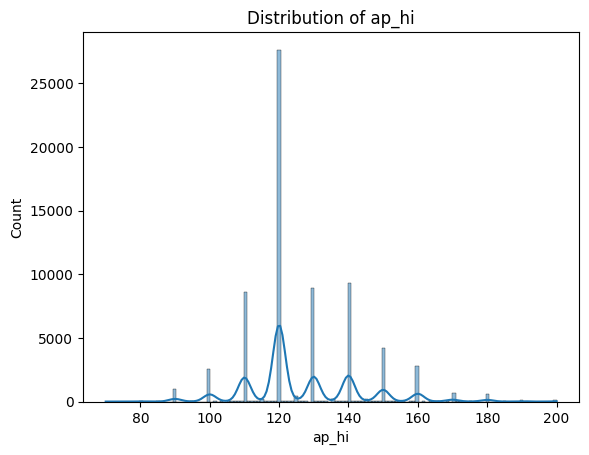

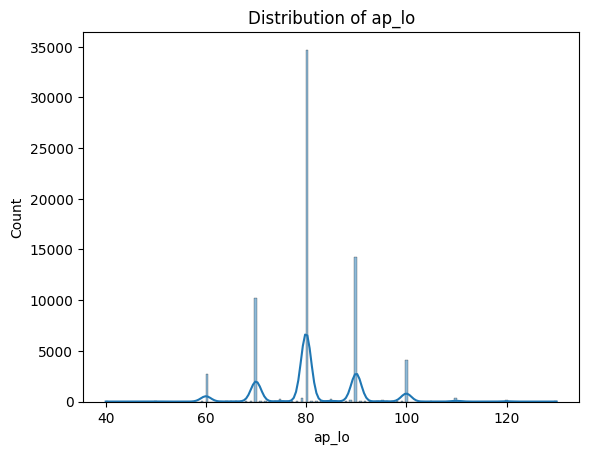

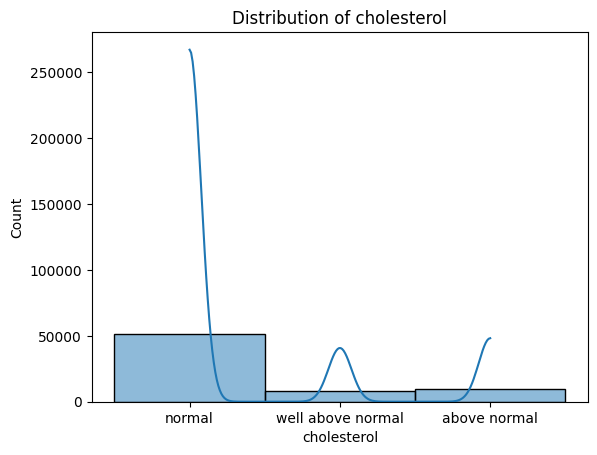

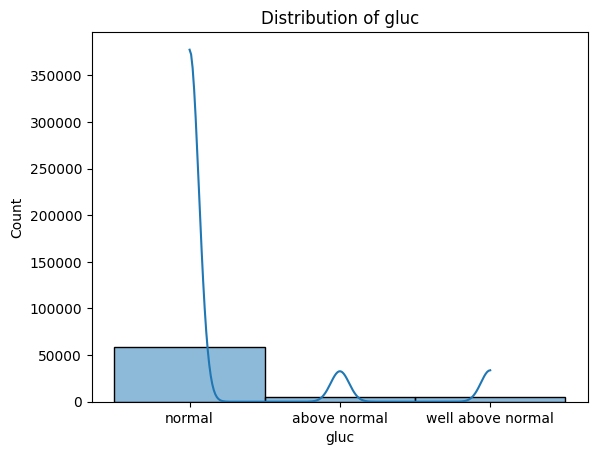

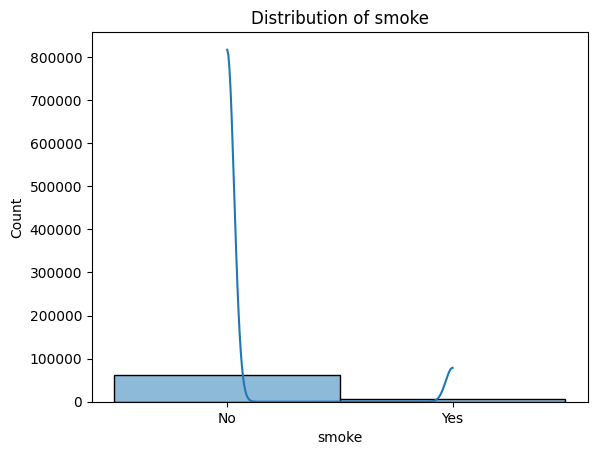

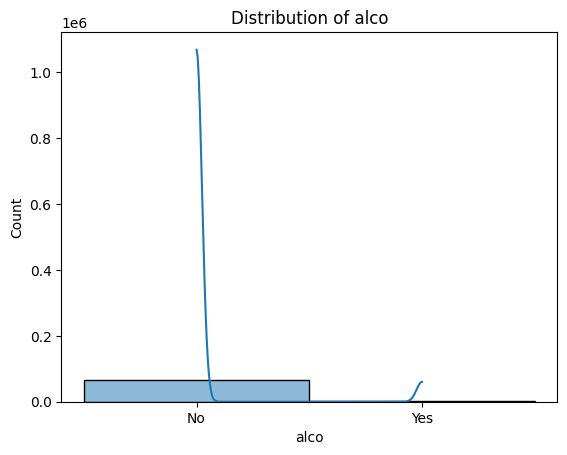

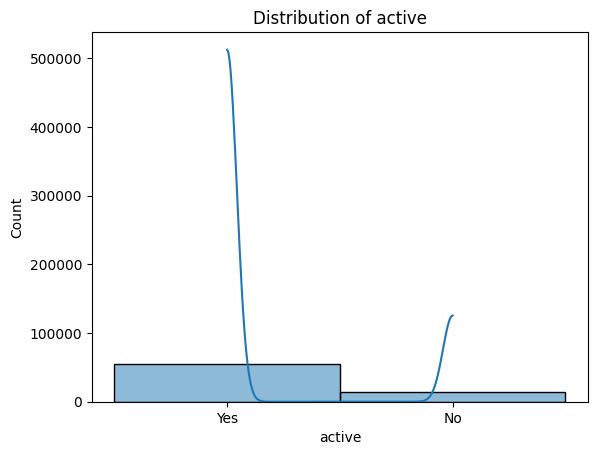

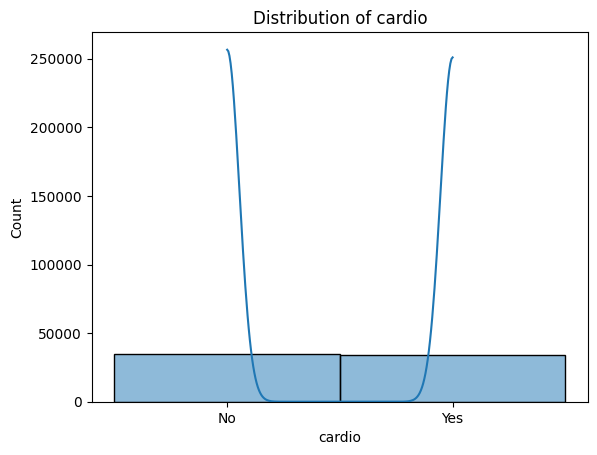

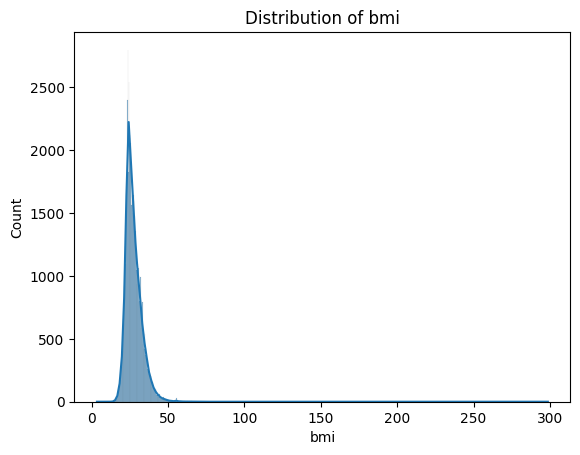

In [ ]:
# Create subplots based on the number of columns in the DataFrame
# Iterate over each column in the DataFrame
for column in df.columns:
    # Create a histogram for each feature
    plt.figure()
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

    # Show the plot
    plt.show()

#Distribution of age isn't normal -> transform the data to normal distribution

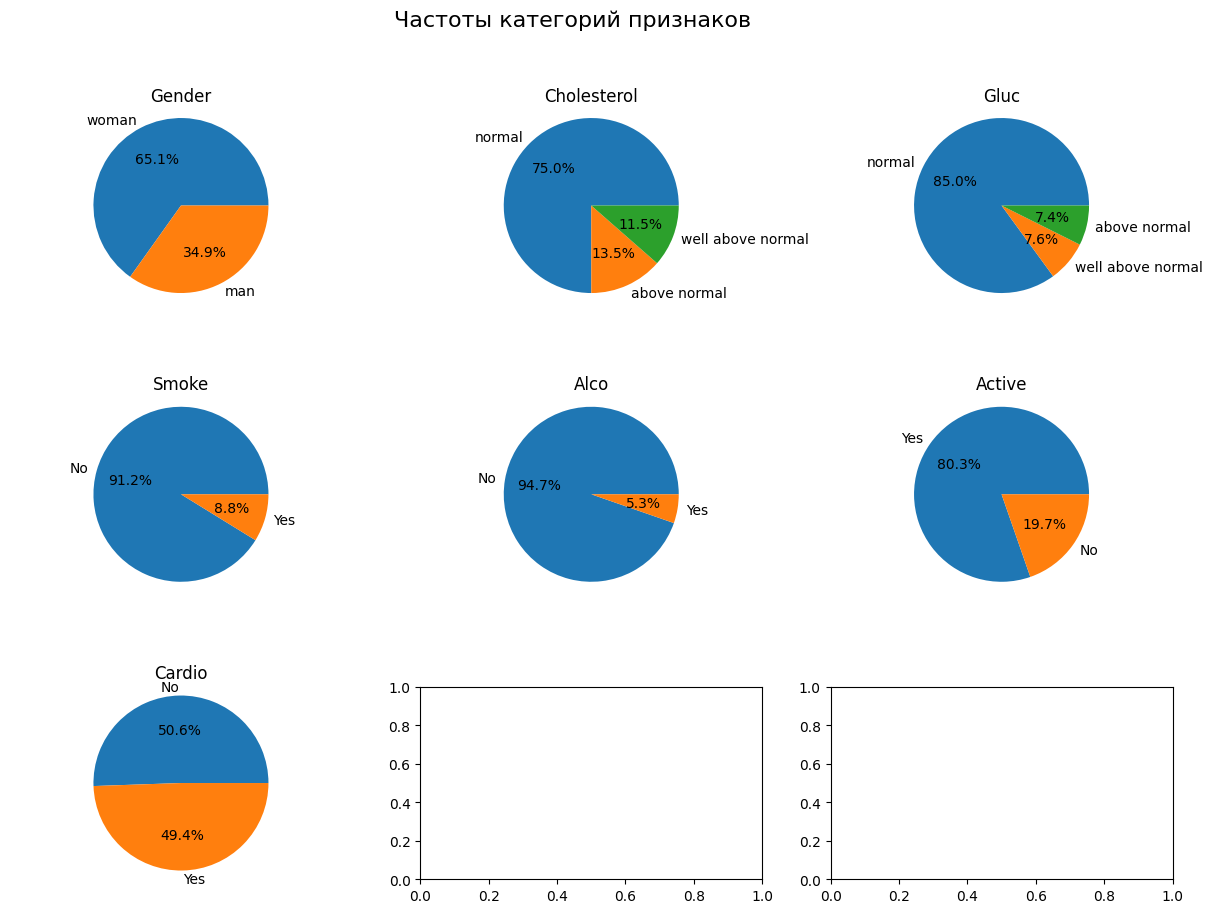

In [ ]:
# Создание фигуры с сеткой subplot
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Построение круговых диаграмм для каждого признака
features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3

    # Рассчитываем частоты для категорий признака
    counts = df[feature].value_counts()

    # Строим круговую диаграмму
    axes[row, col].pie(counts, labels=counts.index, autopct='%1.1f%%')
    axes[row, col].set_title(feature.capitalize())
    axes[row, col].axis('equal')  # Обеспечиваем круглую форму диаграммы

# Улучшение отображения
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Частоты категорий признаков', fontsize=16)

# Отображение диаграмм
plt.show()

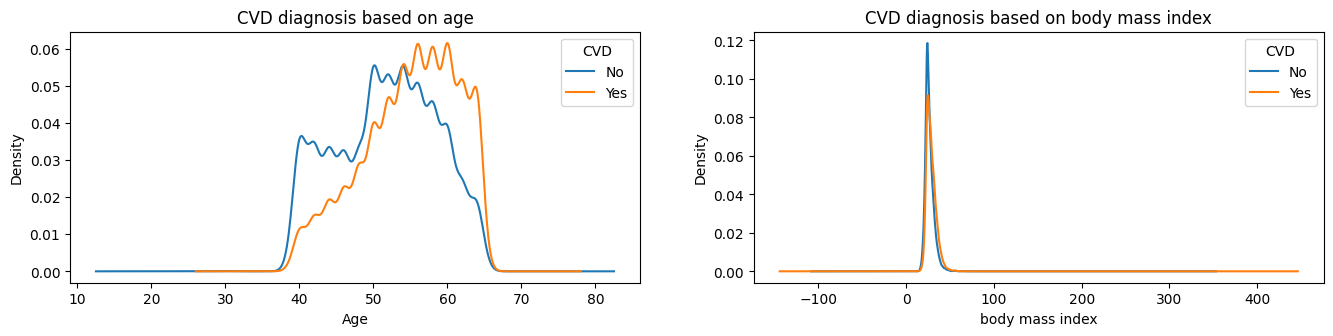

In [ ]:
#Visualize CVD based on age and body mass index
plt.figure(figsize =(25,15))
ax = plt.subplot(4,3, 1)
ax = df.groupby('cardio')['age'].plot(kind='kde', legend=True)
plt.title('CVD diagnosis based on age')
plt.xlabel('Age')
plt.legend(title="CVD")

ax = plt.subplot(4,3, 2)
ax = df.groupby('cardio')['bmi'].plot(kind='kde', legend=True)
plt.title('CVD diagnosis based on body mass index')
plt.xlabel('body mass index')
plt.legend(title="CVD")

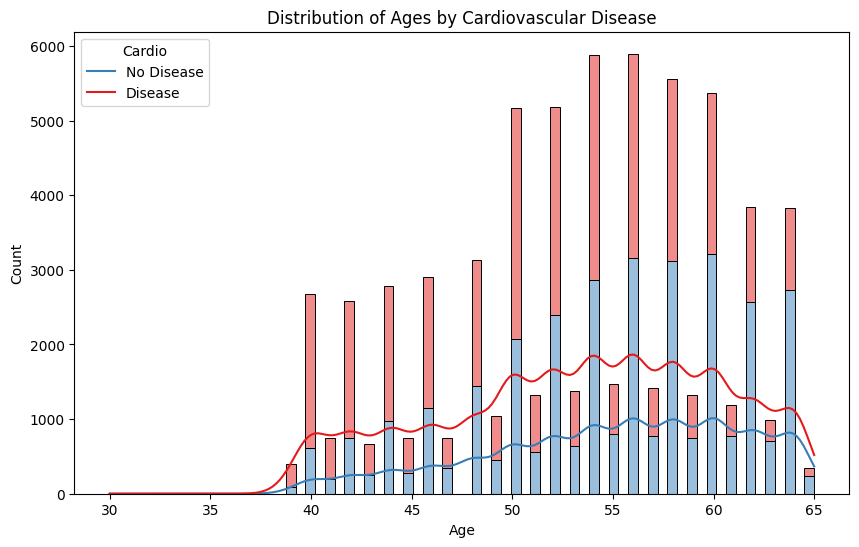

In [ ]:
#plot of heart diease presented with age
custom_colors = {'Yes': '#377EB8', 'No': '#E41A1C'}
# Plotting the distribution of ages for each class with custom colors
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='cardio', kde=True, multiple='stack', palette=custom_colors)
plt.title('Distribution of Ages by Cardiovascular Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Cardio', labels=['No Disease', 'Disease'])
plt.show()

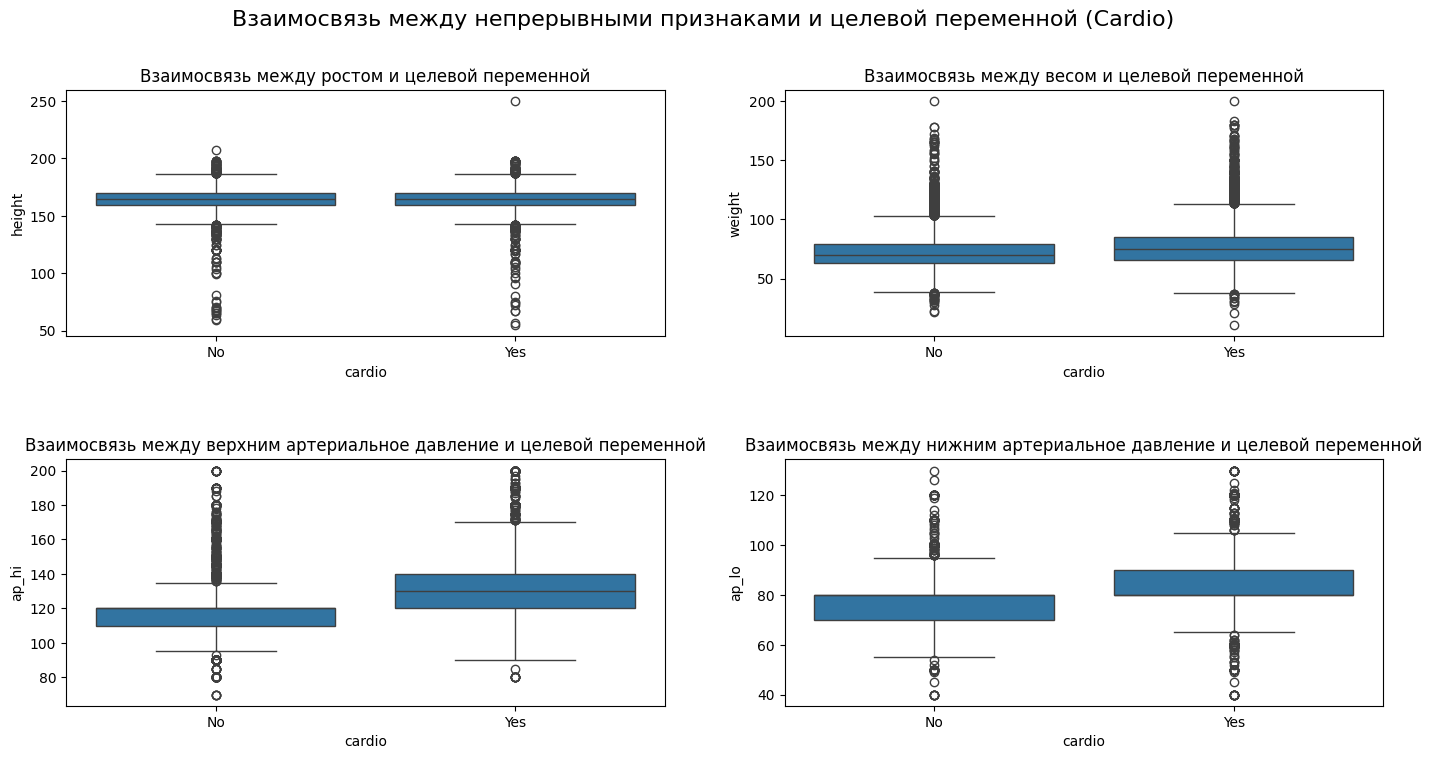

In [ ]:
# Визуализация взаимосвязи между целевой переменной и непрерывными признаками
fig, axes = plt.subplots(2, 2, figsize=(17, 8))


# Взаимосвязь между ростом и целевой переменной
sns.boxplot(x='cardio', y='height', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Взаимосвязь между ростом и целевой переменной')

# Взаимосвязь между весом и целевой переменной
sns.boxplot(x='cardio', y='weight', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Взаимосвязь между весом и целевой переменной')

# Взаимосвязь между верхним артериальным давлением и целевой переменной
sns.boxplot(x='cardio', y='ap_hi', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Взаимосвязь между верхним артериальное давление и целевой переменной')

# Взаимосвязь между нижнем артериальным давлением и целевой переменной
sns.boxplot(x='cardio', y='ap_lo', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Взаимосвязь между нижним артериальное давление и целевой переменной')
# Улучшение отображения
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Взаимосвязь между непрерывными признаками и целевой переменной (Cardio)', fontsize=16)

# Отображение визуализации
plt.show()

Text(0.5, 1.0, 'cardiovascluar disease presence with gender')

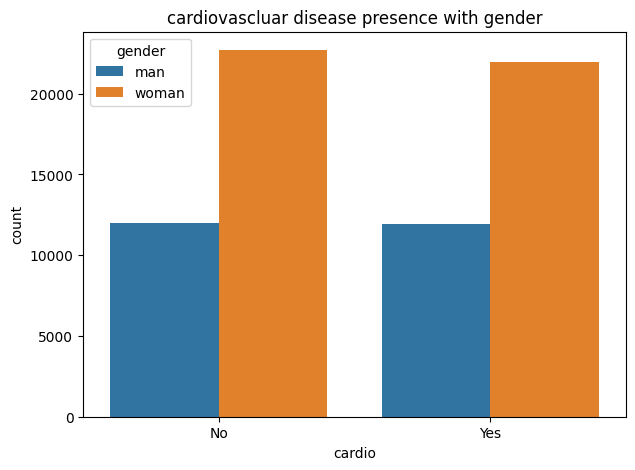

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data = df, x = 'cardio', hue = 'gender')
plt.title("cardiovascluar disease presence with gender")

Text(0.5, 1.0, 'cardiovascluar disease presence with glucose')

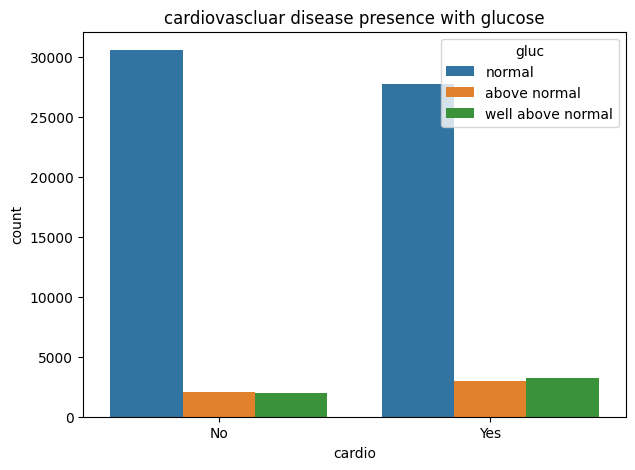

In [ ]:
#Analysis of the effect of glucose levels on the presence of the disease
plt.figure(figsize=(7,5))
sns.countplot(data = df, x = 'cardio', hue = 'gluc')
plt.title("cardiovascluar disease presence with glucose")

Text(0.5, 1.0, 'cardiovascluar disease presence with cholesterol')

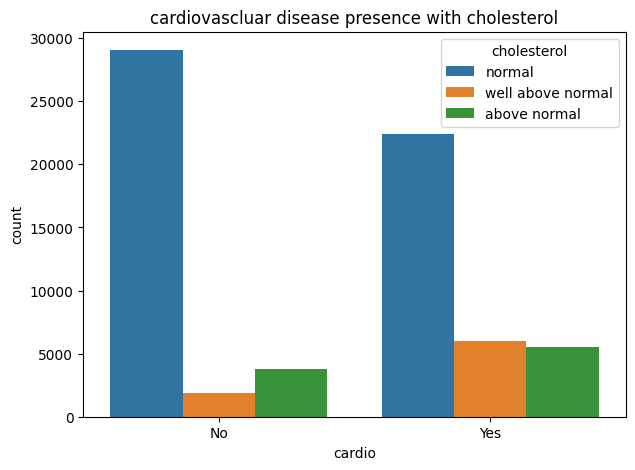

In [ ]:
#Analysis of the effect of cholesterol levels on the presence of the disease
plt.figure(figsize=(7,5))
sns.countplot(data = df, x = 'cardio', hue = 'cholesterol')
plt.title("cardiovascluar disease presence with cholesterol")

Text(0.5, 1.0, 'cardiovascluar disease presence with physical activity')

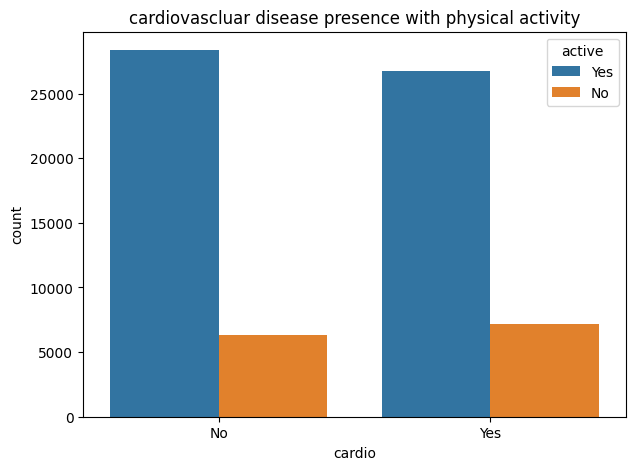

In [ ]:
#Analysis of the effect of physical activity on the presence of the disease
plt.figure(figsize=(7,5))
sns.countplot(data = df, x = 'cardio', hue = 'active')
plt.title("cardiovascluar disease presence with physical activity")

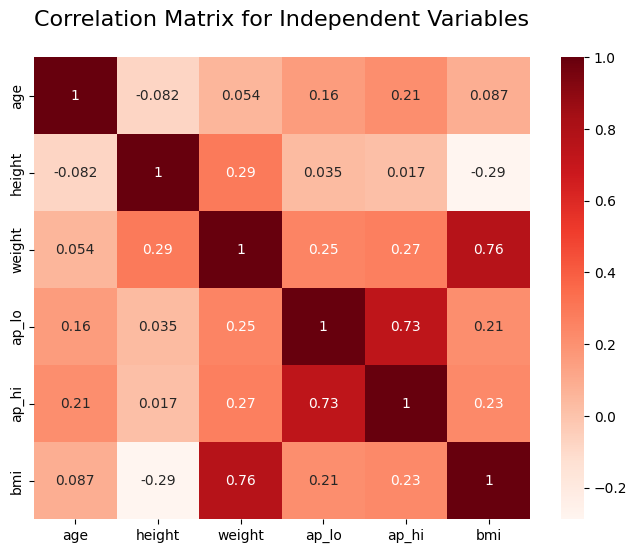

In [ ]:
columns = ['age', 'height', 'weight', 'ap_lo', 'ap_hi','bmi']
# heatmap for correlation between independent variables
plt.figure(figsize = (8, 6))
plt.title('Correlation Matrix for Independent Variables', fontsize = 16, y = 1.05)
sns.heatmap(df[columns].corr(), annot = True, cmap = 'Reds');

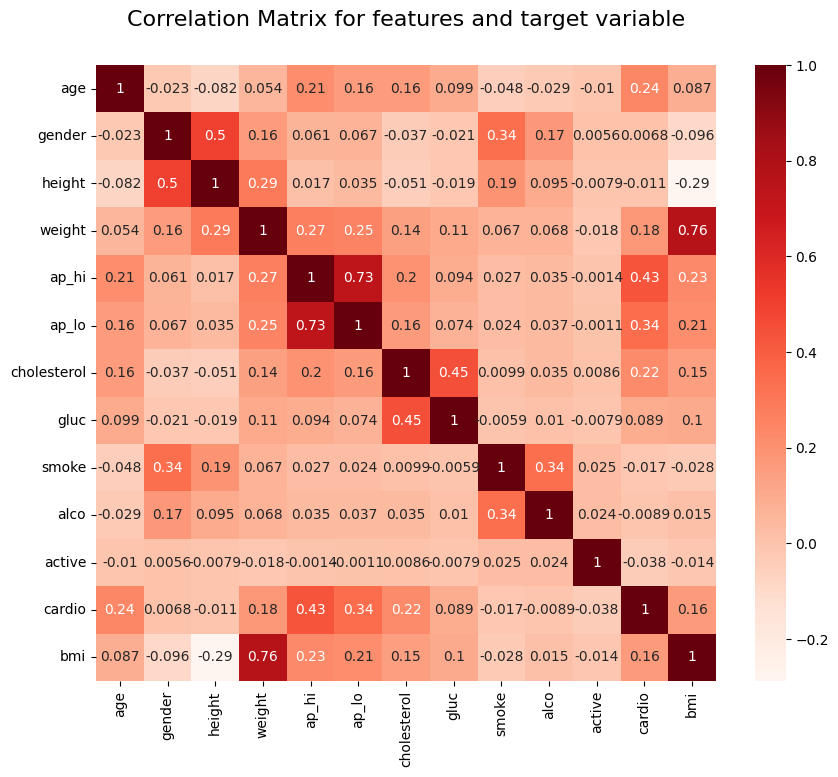

In [ ]:
# heatmap for correlation between features and target variable
plt.figure(figsize = (10, 8))
plt.title('Correlation Matrix for features and target variable', fontsize = 16, y = 1.05)
sns.heatmap(data[data.columns].corr(), annot = True, cmap = 'Reds');
#the most relevant features to the target variable is ap_hi, ap_low, age, cholesterol, weight, bmi

In [ ]:
data.shape

(68582, 13)

In [ ]:
#Compared to the shape of the dataset, the outliers detected can be removed instead of imputing them with any values such as mean,
# 5th and 95th percentile values and so on.
# Checking outliers - detecting and handling outliers only for the continuous features
for col in columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    IQR = q3-q1
    min_Value = q1-1.5*IQR
    max_Value = q3+1.5*IQR

    outliers = []
    for i in data[col]:
        #print(i)
        if i< min_Value or i>max_Value:
            outliers.append(i)
    print(f"Outliers in {col}:",len(outliers))

    df_out = data.loc[(data[col] > min_Value) & (data[col] < max_Value)]

Outliers in age: 4
Outliers in height: 505
Outliers in weight: 1738
Outliers in ap_lo: 3445
Outliers in ap_hi: 946
Outliers in bmi: 2017


In [ ]:
df_out.shape

(66565, 13)

In [ ]:
df_out.describe().T

count        mean        std         min        25%  \
age          66565.0   53.298655   6.774862   30.000000   48.00000   
gender       66565.0    1.354916   0.478492    1.000000    1.00000   
height       66565.0  164.577375   7.801307  120.000000  159.00000   
weight       66565.0   73.032437  12.711089   28.000000   64.00000   
ap_hi        66565.0  126.283933  16.311126   70.000000  120.00000   
ap_lo        66565.0   81.112612   9.266658   40.000000   80.00000   
cholesterol  66565.0    1.356358   0.672342    1.000000    1.00000   
gluc         66565.0    1.220191   0.566020    1.000000    1.00000   
smoke        66565.0    0.089011   0.284761    0.000000    0.00000   
alco         66565.0    0.053286   0.224605    0.000000    0.00000   
active       66565.0    0.804191   0.396825    0.000000    1.00000   
cardio       66565.0    0.488665   0.499875    0.000000    0.00000   
bmi          66565.0   26.972540   4.410616   14.524328   23.80869   

                    50%       75%         max  
age           54.000000   58.0000   65.000000  
gender         1.000000    2.0000    2.000000  
height       165.000000  170.0000  207.000000  
weight        71.000000   80.0000  135.000000  
ap_hi        120.000000  140.0000  200.000000  
ap_lo         80.000000   90.0000  130.000000  
cholesterol    1.000000    1.0000    3.000000  
gluc           1.000000    1.0000    3.000000  
smoke          0.000000    0.0000    1.000000  
alco           0.000000    0.0000    1.000000  
active         1.000000    1.0000    1.000000  
cardio         0.000000    1.0000    1.000000  
bmi           26.171875   29.7442   39.476813

In [ ]:
#Since out data does not follow gaussian distribution (i.e. it is not normal) we apply normalization to our data which adjusts the values of our numeric data
#to common scale without altering the range of the data. We also have removed outliers as well.
#Check for people with,without cardio
df_out['cardio'].value_counts()

cardio
0    34037
1    32528
Name: count, dtype: int64

In [ ]:
#split the dataset into features and target variable, we just have to normalize the features data
X = df_out.loc[:, df.columns != 'cardio']
y = df_out[['cardio']]
X.shape

(66565, 12)

In [ ]:
y.shape

(66565, 1)

In [ ]:
#normalizing the data
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X)

X = norm.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
#Split data into 75% training and 25% testing dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 42)
print('Training dataset size:', X_train.shape)
print('Validation dataset size:', X_val.shape)

Training dataset size: (49923, 12)
Validation dataset size: (16642, 12)


In [ ]:
#Applying random forest classifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV
#gridsearch to find best parameters for random forest classifier
#params = {'criterion' : ['gini', "entropy", "log_loss"],
#          'max_depth' : range(2,16,1),
#         'n_estimators' : [100, 200, 300],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4],
#         'bootstrap': [True],
#         'n_jobs': [2,3,4,5]}

#grid = GridSearchCV(RandomForestClassifier(), params, refit = True, verbose = 3,n_jobs=-1, scoring='accuracy', cv=5)

# fitting the model for grid search
#grid.fit(X_train, y_train)

# print best parameter after tuning
#print(grid.best_params_)
#grid_predictions = grid.predict(X_val)

Accuracy of the Random Forest model: 73.19%

f1 score of the Random Forest model: 73.31%

Cross validation accuracy of the Random Forest model: 73.38%

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75      9475
           1       0.67      0.76      0.71      7167

    accuracy                           0.73     16642
   macro avg       0.73      0.73      0.73     16642
weighted avg       0.74      0.73      0.73     16642



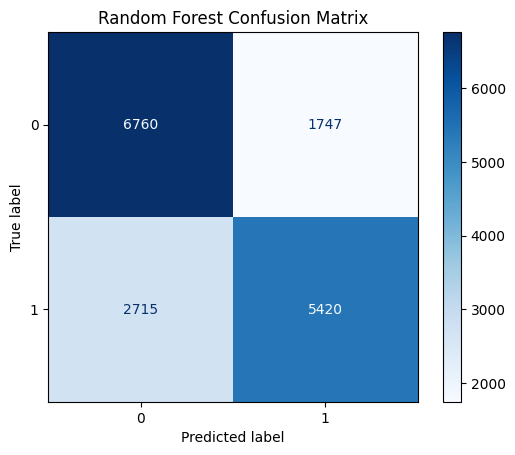

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn import metrics
rf_model = RandomForestClassifier(criterion='gini', max_depth=9, n_estimators=19, n_jobs=4, max_features='sqrt')

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)

accuracy = accuracy_score(y_val,y_pred)
f1score = metrics.f1_score(y_pred,y_val,average='weighted')

kfold = KFold(n_splits=5)
cv = cross_val_score(rf_model,X_train,y_train,cv=kfold)

report = classification_report(y_pred,y_val, zero_division=1)

print(f"Accuracy of the Random Forest model: {round(accuracy*100, 2)}%\n")
print(f"f1 score of the Random Forest model: {round(f1score*100, 2)}%\n")
print(f"Cross validation accuracy of the Random Forest model: {round(np.mean(cv)*100, 2)}%\n")
print("Classification Report:\n", report)

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.grid(visible=False)
plt.show()

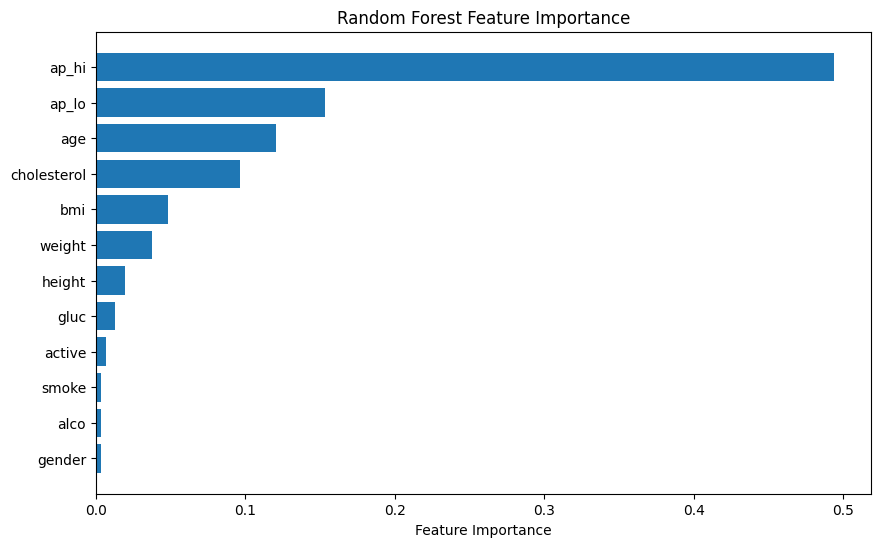

In [ ]:
# Get the feature importance
feature_importances = rf_model.feature_importances_
# Sort the features by importance
sorted_indices = feature_importances.argsort()

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), feature_importances[sorted_indices])
plt.yticks(range(X.shape[1]), [df_out.loc[:, df.columns != 'cardio'].columns[i] for i in sorted_indices])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [ ]:
#use RandomizedSearchCV from scikit-learn for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions to search over
#param_distributions = {
#    'n_estimators': randint(1, 20),
#   'max_depth': randint(1, 20),
#   'criterion': ['gini', 'entropy', 'log_loss'],
#    'n_jobs': [-1, 1, 2, 4, 8]
#}

# Create a random forest classifier instance
rf_model = RandomForestClassifier()

# Create a RandomizedSearchCV instance
#random_search = RandomizedSearchCV(
#   estimator=rf_model,
#    param_distributions=param_distributions,
#    n_iter=972,
#    cv=5,
#    verbose=2,
#    random_state=42,
#    n_jobs=-1
#)
# Fit the RandomizedSearchCV object
#random_search.fit(X_train, y_train)

# Print the best hyperparameters
#print(f"Best hyperparameters: {random_search.best_params_}")

# Make predictions on the validation set using the best model
#y_pred = random_search.best_estimator_.predict(X_val)

# Calculate evaluation metrics
#accuracy = accuracy_score(y_val, y_pred)
#f1score = metrics.f1_score(y_pred, y_val, average='weighted')

# Print the evaluation metrics
#print(f"Accuracy of the Random Forest model: {round(accuracy*100, 2)}%")
#print(f"F1 score of the Random Forest model: {round(f1score*100, 2)}%")

# Generate classification report and confusion matrix
#report = classification_report(y_pred, y_val, zero_division=1)
#print("Classification Report:\n", report)

#cm = confusion_matrix(y_val, y_pred)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_search.best_estimator_.classes_)
#disp.plot(cmap=plt.cm.Blues)
#plt.title("Random Forest Confusion Matrix")
#plt.grid(visible=False)
#plt.show()


Accuracy of the Random Forest model: 69.53%

f1 score of the Random Forest model: 69.53%

Cross validation accuracy of the Random Forest model: 70.23%

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.70      8618
           1       0.68      0.69      0.69      8024

    accuracy                           0.70     16642
   macro avg       0.69      0.70      0.70     16642
weighted avg       0.70      0.70      0.70     16642



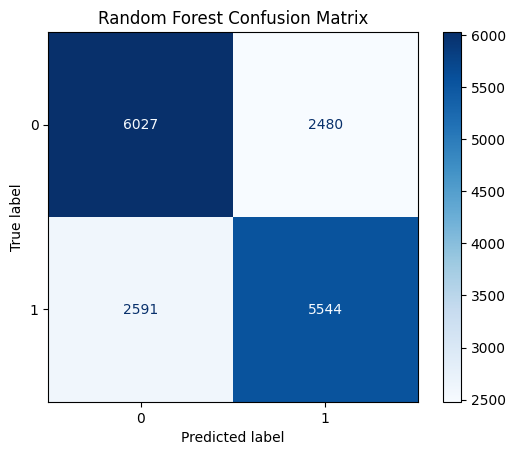

In [ ]:
#apply random forest consists of 19 trees
rf_model = RandomForestClassifier( n_estimators=19, n_jobs=-1)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)

accuracy = accuracy_score(y_val,y_pred)
f1score = metrics.f1_score(y_pred,y_val,average='weighted')

kfold = KFold(n_splits=5)
cv = cross_val_score(rf_model,X_train,y_train,cv=kfold)

report = classification_report(y_pred,y_val, zero_division=1)

print(f"Accuracy of the Random Forest model: {round(accuracy*100, 2)}%\n")
print(f"f1 score of the Random Forest model: {round(f1score*100, 2)}%\n")
print(f"Cross validation accuracy of the Random Forest model: {round(np.mean(cv)*100, 2)}%\n")
print("Classification Report:\n", report)

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.grid(visible=False)
plt.show()

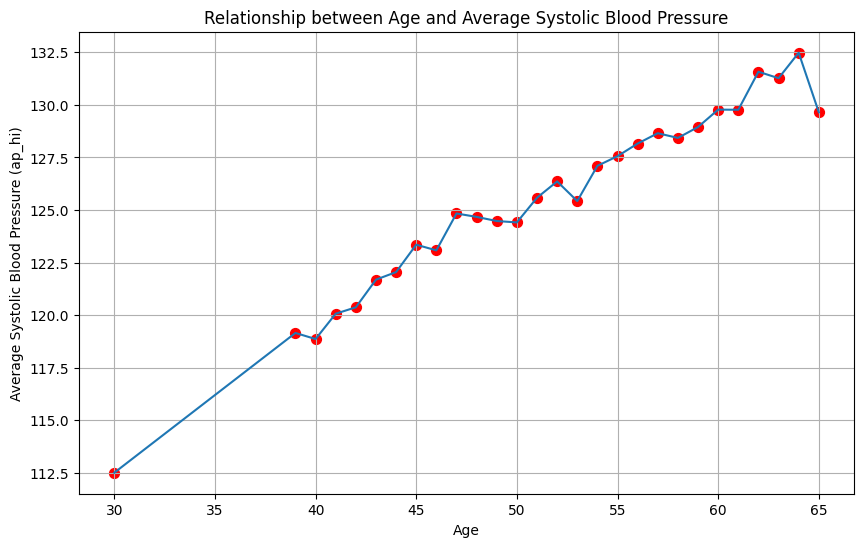

In [ ]:
# Group the data by age and calculate the average ap_hi
age_ap_hi = df.groupby('age')['ap_hi'].mean().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(age_ap_hi['age'], age_ap_hi['ap_hi'])
plt.scatter(age_ap_hi['age'], age_ap_hi['ap_hi'], s=50, color='r')
plt.xlabel('Age')
plt.ylabel('Average Systolic Blood Pressure (ap_hi)')
plt.title('Relationship between Age and Average Systolic Blood Pressure')
plt.grid()
plt.show()


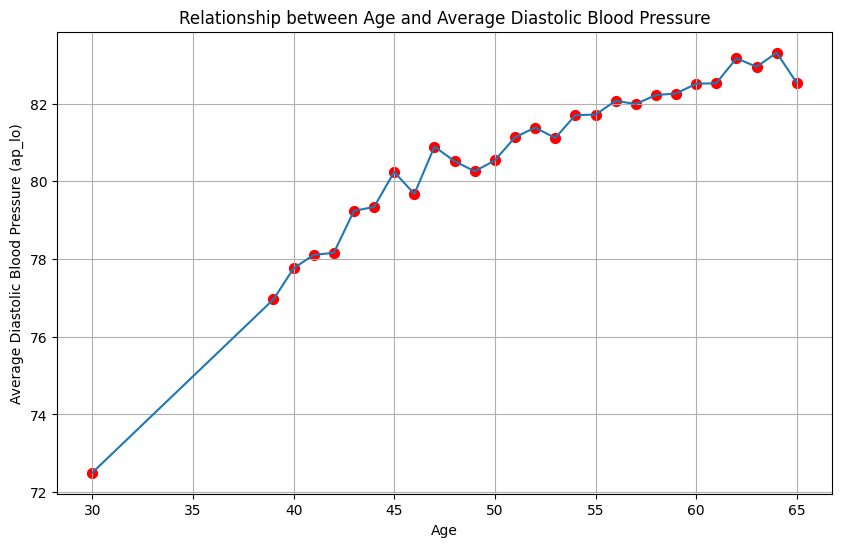

In [ ]:
# Group the data by age and calculate the average ap_hi
age_ap_lo = df.groupby('age')['ap_lo'].mean().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(age_ap_lo['age'], age_ap_lo['ap_lo'])
plt.scatter(age_ap_hi['age'], age_ap_lo['ap_lo'], s=50, color='r')
plt.xlabel('Age')
plt.ylabel('Average Diastolic Blood Pressure (ap_lo)')
plt.title('Relationship between Age and Average Diastolic Blood Pressure')
plt.grid()
plt.show()

SyntaxError: invalid syntax (<ipython-input-1-35fd0855a7a6>, line 1)